# **Project Name**    - **Zomato Restaurant Clustering**



##### **Project Type**    - Unsupervised
##### **Contribution**    - Indivisual
##### **Team Member 1 -** - SAGAR JAIN


# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

https://github.com/Sagarjain93/Machine-Learning-Portfolio/tree/main/03_ML_Practice/Zomato_Restaurant_Clustering

# **Problem Statement**


The Indian restaurant industry is growing rapidly, with thousands of restaurants listed on Zomato across different cities. Customers rely heavily on ratings, reviews, pricing, and services like online delivery and table booking to choose restaurants.

However, with such a large number of restaurants, it becomes difficult:

*  For customers to identify the best restaurant based on their preferences.

*  For Zomato to understand restaurant performance patterns across cities.

*  To categorize restaurants into meaningful business segments.

This project aims to analyze Zomato restaurant data to:

*  Understand customer behavior through ratings and reviews.

*  Identify important factors affecting restaurant performance.

*  Segment restaurants into different clusters based on features like cost, ratings, and services.

*  Provide actionable business insights that can help customers make better decisions and help Zomato improve strategic planning.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [190]:
# ==============================
# Basic Libraries
# ==============================

import numpy as np
import pandas as pd

# ==============================
# Visualization Libraries
# ==============================

import matplotlib.pyplot as plt
import seaborn as sns

# To display plots inside notebook
%matplotlib inline

# Improve visualization aesthetics
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (8, 5)

# ==============================
# Statistical Libraries (For Hypothesis Testing)
# ==============================

from scipy import stats

# ==============================
# Warnings
# ==============================

import warnings
warnings.filterwarnings("ignore")

### Dataset Loading

In [191]:
# Clone my GitHub repository
!git clone "https://github.com/Sagarjain93/Machine-Learning-Portfolio.git"

fatal: destination path 'Machine-Learning-Portfolio' already exists and is not an empty directory.


In [192]:
# Define base path
base_path = "Machine-Learning-Portfolio/03_ML_Practice/Zomato_Restaurant_Clustering/raw_data/"

# Load metadata dataset
metadata_df = pd.read_csv(base_path + "Zomato Restaurant names and Metadata.csv")

# Load reviews dataset
reviews_df = pd.read_csv(base_path + "Zomato Restaurant reviews.csv")


### Dataset First View

In [193]:
# Dataset First Look
metadata_df.head()

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [194]:
# Dataset First Look
reviews_df.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


### Dataset Rows & Columns count

In [195]:
metadata_df.shape

(105, 6)

In [196]:
reviews_df.shape

(10000, 7)

In [197]:
# Dataset Rows & Columns count
print("="*60)
print(" DATASET SHAPE SUMMARY")
print("="*60)

print("\n  METADATA DATASET")
print(f"   ➤ Rows    : {metadata_df.shape[0]:,}")
print(f"   ➤ Columns : {metadata_df.shape[1]}")

print("\n REVIEWS DATASET")
print(f"   ➤ Rows    : {reviews_df.shape[0]:,}")
print(f"   ➤ Columns : {reviews_df.shape[1]}")

print("\n" + "="*60)

 DATASET SHAPE SUMMARY

  METADATA DATASET
   ➤ Rows    : 105
   ➤ Columns : 6

 REVIEWS DATASET
   ➤ Rows    : 10,000
   ➤ Columns : 7



### Dataset Information

In [198]:
# Dataset Info
metadata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.1+ KB


**Important Observations:**

*  All columns are object type
    → Even Cost is stored as text (not numeric).
    → We will need to convert it later.

*  Missing Values:

    Collections → Only 51 non-null out of 105
    → Almost 50% missing

*  Timings → 1 value missing

*  Small dataset (105 restaurants only)

In [199]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


**Important Observations:**

*  Missing values:

    Reviewer → 38 missing

    Review → 45 missing

    Rating → 38 missing

    Metadata → 38 missing

    Time → 38 missing

*  Rating is object type
    → Should be numeric
    → Might contain text like "Rated 4.0"

*  Pictures is already numeric (int64)

#### Duplicate Values

In [200]:
# Dataset Duplicate Value Count
metadata_df.duplicated().sum()

np.int64(0)

In [201]:
reviews_df.duplicated().sum()

np.int64(36)

#### Missing Values/Null Values

In [202]:
# Missing Values in metadata dataset
metadata_df.isnull().sum()

,0
Name,0
Links,0
Cost,0
Collections,54
Cuisines,0
Timings,1


In [203]:
# Missing Values in reviews dataset
reviews_df.isnull().sum()

,0
Restaurant,0
Reviewer,38
Review,45
Rating,38
Metadata,38
Time,38
Pictures,0


In [204]:
# Value Counts in metadata and review dataset
print("="*50)
print("NULL VALUE COUNT - METADATA DATASET")
print("="*50)

meta_null = metadata_df.isnull().sum()
meta_null = meta_null[meta_null > 0].sort_values(ascending=False)

print(meta_null)
print("\nTotal Missing Values:", meta_null.sum())


print("\n" + "="*50)
print("NULL VALUE COUNT - REVIEWS DATASET")
print("="*50)

review_null = reviews_df.isnull().sum()
review_null = review_null[review_null > 0].sort_values(ascending=False)

print(review_null)
print("\nTotal Missing Values:", review_null.sum())

NULL VALUE COUNT - METADATA DATASET
Collections    54
Timings         1
dtype: int64

Total Missing Values: 55

NULL VALUE COUNT - REVIEWS DATASET
Review      45
Reviewer    38
Rating      38
Metadata    38
Time        38
dtype: int64

Total Missing Values: 197


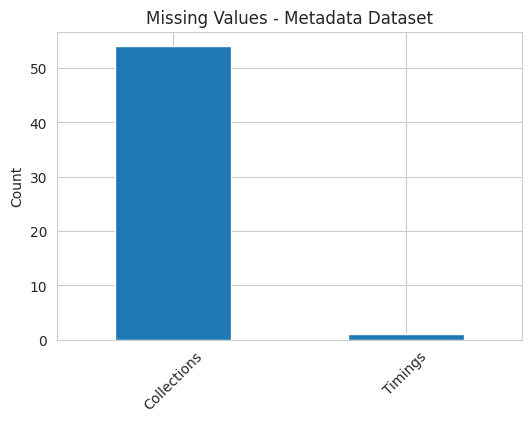

In [205]:
# Visualizing the missing values in metadata dataset
plt.figure(figsize=(6,4))
meta_null.plot(kind='bar')
plt.title("Missing Values - Metadata Dataset")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

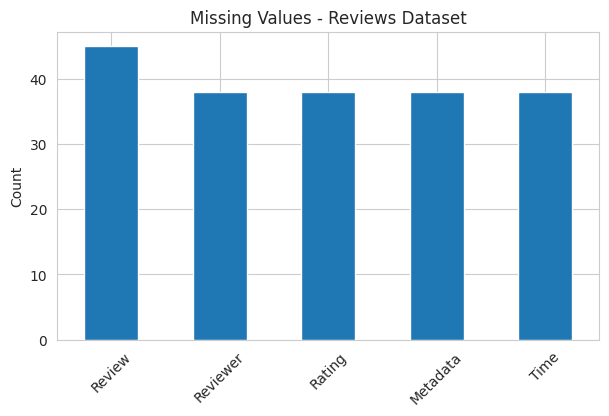

In [206]:
# Visualizing the missing values in reviews dataset
plt.figure(figsize=(7,4))
review_null.plot(kind='bar')
plt.title("Missing Values - Reviews Dataset")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

### What did you know about your dataset?

**Dataset Structure**

The project consists of two separate datasets:

**Metadata Dataset**

  *  Contains 105 restaurants

  *  6 columns: Name, Links, Cost, Collections, Cuisines, Timings

  *  All columns are stored as object (text) data type

**Reviews Dataset**

  *  Contains 10,000 customer reviews

  *  7 columns: Restaurant, Reviewer, Review, Rating, Metadata, Time, Pictures

  *  Most columns are object type

  *  Pictures column is numeric (int64)

----------
**Relationship Between Datasets**

  *  One restaurant (metadata) can have multiple reviews.

  *  Reviews dataset is significantly larger than metadata dataset.

  *  Both datasets can be connected using the restaurant name.  
  ---

**Data Quality Observations**

**Missing Values**

Metadata Dataset:
  
*  Collections column has more than 50% missing values.

*  Timings column has only 1 missing value.

Reviews Dataset:

*  Very small percentage (<1%) missing values in Reviewer, Review, Rating, Metadata, and Time columns.  

---
**Duplicate Records**

*  No duplicate rows found in metadata dataset.

*  36 duplicate rows identified in reviews dataset (not removed yet).

---

**Data Type Observations**

*  Cost column is stored as text and needs conversion to numeric.

*  Rating column is stored as text and needs cleaning before analysis.

*  Time column may require conversion to datetime format for further analysis.
---

**Overall Understanding**

*  The dataset is structured and mostly clean.

*  Reviews dataset provides rich textual data suitable for sentiment analysis.

*  Metadata dataset provides restaurant-level features useful for clustering.

*  Some preprocessing and cleaning will be required before modeling.

## ***2. Understanding Your Variables***

In [207]:
# Dataset Columns
metadata_df.columns

Index(['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings'], dtype='object')

In [208]:
# Dataset Describe
reviews_df.columns

Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
       'Pictures'],
      dtype='object')

### Variables Description

**Metadata Dataset Variables**

| Variable Name | Description                                                        | Data Type |
| ------------- | ------------------------------------------------------------------ | --------- |
| Name          | Name of the restaurant                                             | Object    |
| Links         | URL link of the restaurant on Zomato                               | Object    |
| Cost          | Approximate cost for two people (stored as text, needs conversion) | Object    |
| Collections   | Category tags or special listings (e.g., trending, featured)       | Object    |
| Cuisines      | Types of cuisines offered by the restaurant                        | Object    |
| Timings       | Operating hours of the restaurant                                  | Object    |

**Reviews Dataset Variables**

| Variable Name | Description                                                   | Data Type |
| ------------- | ------------------------------------------------------------- | --------- |
| Restaurant    | Name of the restaurant being reviewed                         | Object    |
| Reviewer      | Name of the customer who gave the review                      | Object    |
| Review        | Text content of the customer review                           | Object    |
| Rating        | Rating given by the customer (stored as text, needs cleaning) | Object    |
| Metadata      | Additional review-related information                         | Object    |
| Time          | Timestamp of the review                                       | Object    |
| Pictures      | Number of pictures shared with the review                     | Integer   |



### Check Unique Values for each variable.

In [209]:
# Check Unique Values for each variable.
metadata_df.nunique()

,0
Name,105
Links,105
Cost,29
Collections,42
Cuisines,92
Timings,77


*  105 unique restaurants → matches total rows → no duplicates

*  Cost has 29 unique values → good variability

*  Cuisines has 92 unique values → very diverse dataset

*  High uniqueness in Timings → not useful for clustering

In [210]:
reviews_df.nunique()

,0
Restaurant,100
Reviewer,7446
Review,9364
Rating,10
Metadata,2477
Time,9782
Pictures,36


*  100 restaurants in reviews vs 105 in metadata
  → 5 restaurants may not have reviews

*  Rating has only 10 unique values
  → Likely 1–5 scale with decimals

*  Review text is highly unique → good for sentiment analysis

*  Reviewer count (7446) < total reviews (10000)
  → Some users posted multiple reviews

## 3. ***Data Wrangling***

### **MetaData Dataset Wrangling Code**

#### **Handle Missing Values**

In [211]:
# Checking percentage of missing values
meta_missing_percent = (metadata_df.isnull().sum() / len(metadata_df)) * 100
meta_missing_percent

,0
Name,0.000000
Links,0.000000
Cost,0.000000
Collections,51.428571
Cuisines,0.000000
Timings,0.952381


**Handling Missing Values in Collections Column**

In [212]:
metadata_df["Collections"] = metadata_df["Collections"].fillna("Not Specified")

**Check**

In [213]:
metadata_df["Collections"].isnull().sum()

np.int64(0)

**Handling Missing Values in Timings Column**

In [214]:
metadata_df = metadata_df.dropna(subset=["Timings"])

**Check**

In [215]:
metadata_df["Timings"].isnull().sum()

np.int64(0)

#### **Cleaning Cost column**

In [216]:
metadata_df["Cost"].head(10)

,Cost
0,800
1,800
2,"1,300"
3,800
4,"1,200"
5,"1,500"
6,500
7,300
8,"1,000"
9,350


In [217]:
# removing commas from Cost column
metadata_df["Cost"] = metadata_df["Cost"].str.replace(",", "")

# Converting Cost Column to Integer
metadata_df["Cost"] = metadata_df["Cost"].astype(int)

**Check**

In [218]:
metadata_df["Cost"].head()

,Cost
0,800
1,800
2,1300
3,800
4,1200


In [219]:
metadata_df["Cost"].dtype

dtype('int64')

#### **Detecting Outliers in Cost column**

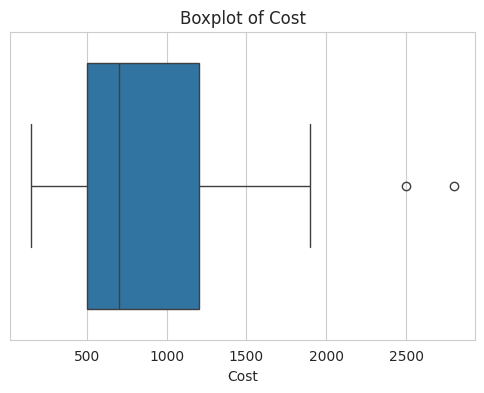

In [220]:
# Using Boxplot to visualy detect outliers
plt.figure(figsize=(6,4))
sns.boxplot(x=metadata_df["Cost"])
plt.title("Boxplot of Cost")
plt.show()

In [221]:
#Using IQR method to calculate outliers mathematically.
Q1 = metadata_df["Cost"].quantile(0.25)
Q3 = metadata_df["Cost"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = metadata_df[(metadata_df["Cost"] < lower_bound) |
                       (metadata_df["Cost"] > upper_bound)]

print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)
print("Number of Outliers:", outliers.shape[0])
outliers[["Name","Cost"]]

Lower Bound: -550.0
Upper Bound: 2250.0
Number of Outliers: 2


,Name,Cost
56,Feast - Sheraton Hyderabad Hotel,2500
92,Collage - Hyatt Hyderabad Gachibowli,2800


#### **Standardize Column Names**

In [222]:
metadata_df.columns = (
    metadata_df.columns
    .str.lower()
    .str.strip()
    .str.replace(" ", "_")
)

metadata_df.columns

Index(['name', 'links', 'cost', 'collections', 'cuisines', 'timings'], dtype='object')

**Check**

In [223]:
metadata_df.columns

Index(['name', 'links', 'cost', 'collections', 'cuisines', 'timings'], dtype='object')

#### **Remove Extra Space in Cuisines column**

In [224]:
metadata_df['cuisines']

,cuisines
0,"Chinese, Continental, Kebab, European, South I..."
1,"Biryani, North Indian, Chinese"
2,"Asian, Mediterranean, North Indian, Desserts"
3,"Biryani, North Indian, Chinese, Seafood, Bever..."
4,"Asian, Continental, North Indian, Chinese, Med..."
...,...
100,"Fast Food, Salad"
101,"Bakery, Mithai"
102,"North Indian, Biryani, Chinese"
103,Fast Food


In [225]:
metadata_df["cuisines"] = (
    metadata_df["cuisines"]
    .str.strip()
    .str.replace(", ", ",")
)

### **Review Dataset Wrangling Code**

#### **Standardize Column Names**

In [226]:
reviews_df.columns

Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
       'Pictures'],
      dtype='object')

In [227]:
#standardizing all the columns in review_df dataset
reviews_df.columns = (
    reviews_df.columns
    .str.lower()
    .str.strip()
    .str.replace(" ", "_")
)

**Check**

In [228]:
#checking after standardization of review_df dataset
reviews_df.columns

Index(['restaurant', 'reviewer', 'review', 'rating', 'metadata', 'time',
       'pictures'],
      dtype='object')

#### **Handling Missing Rows**

Missing rows in **review column**

In [229]:
# check missing values in review column
reviews_df[reviews_df["review"].isnull()].head()

,restaurant,reviewer,review,rating,metadata,time,pictures
2360,Amul,Lakshmi Narayana,NaN,5,0 Reviews,7/29/2018 18:00,0
5799,Being Hungry,Surya,NaN,5,"4 Reviews , 4 Followers",7/19/2018 23:55,0
6449,Hyderabad Chefs,Madhurimanne97,NaN,5,1 Review,7/23/2018 16:29,0
6489,Hyderabad Chefs,Harsha,NaN,5,1 Review,7/8/2018 21:19,0
7954,Olive Garden,ARUGULLA PRAVEEN KUMAR,NaN,3,"1 Review , 1 Follower",8/9/2018 23:25,0


Missing rows in **rating column**

In [230]:
# check missing rows in rating column
reviews_df[reviews_df["rating"].isnull()].head()

,restaurant,reviewer,review,rating,metadata,time,pictures
8777,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8778,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8779,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8780,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8781,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0


Drop rows where **rating** is null in **rating column**

In [231]:
#droping the rows from the rating column where the values are null
reviews_df = reviews_df.dropna(subset=["rating"])

**Check Shape**

In [232]:
# After droping null values checking the shape of reviews_df dataset
reviews_df.shape

(9962, 7)

In [233]:
# check null values in review column after droping null values from rating column
reviews_df["review"].isnull().sum()

np.int64(7)

Drop 7 rows in the **review column**

In [234]:
# droping the rows of review column having null values
reviews_df = reviews_df.dropna(subset=["review"])

**Check Shape**

In [235]:
#c checking the shape of review_df dataset
reviews_df.shape

(9955, 7)

#### **Clean the rating Column**

In [236]:
# insepcting unqiue values in rating column
reviews_df["rating"].unique()

array(['5', '4', '1', '3', '2', '3.5', '4.5', '2.5', '1.5', 'Like'],
      dtype=object)

In [237]:
#checking the no of rows having "Like" in rating column
(reviews_df["rating"] == "Like").sum()

np.int64(1)

In [238]:
# removing the row having "like" value in rating column
reviews_df = reviews_df[reviews_df["rating"] != "Like"]

reviews_df["rating"].unique()

array(['5', '4', '1', '3', '2', '3.5', '4.5', '2.5', '1.5'], dtype=object)

#### **Convert rating Column to Float**

In [239]:
# converting the rating column from string to float
reviews_df["rating"] = reviews_df["rating"].astype(float)

reviews_df["rating"].dtype

dtype('float64')

#### **Convert time Column to Datetime**

In [240]:
# Convert 'time' column from object (string) to datetime format
# errors='coerce' ensures that any invalid format becomes NaT instead of breaking the code
reviews_df["time"] = pd.to_datetime(reviews_df["time"], errors="coerce")

# Check the datatype after conversion
reviews_df["time"].dtype

dtype('<M8[ns]')

In [241]:
# Check if any values became NaT (invalid datetime)
reviews_df["time"].isnull().sum()

np.int64(0)

#### **Dropping Irrelevant Column**

In [242]:
# View first 10 values of metadata column
reviews_df["metadata"].head(10)

,metadata
0,"1 Review , 2 Followers"
1,"3 Reviews , 2 Followers"
2,"2 Reviews , 3 Followers"
3,"1 Review , 1 Follower"
4,"3 Reviews , 2 Followers"
5,1 Review
6,1 Review
7,1 Review
8,"1 Review , 1 Follower"
9,"1 Review , 1 Follower"


In [243]:
# Check some unique values
reviews_df["metadata"].unique()[:10]

array(['1 Review , 2 Followers', '3 Reviews , 2 Followers',
       '2 Reviews , 3 Followers', '1 Review , 1 Follower', '1 Review',
       '3 Reviews , 1 Follower', '2 Reviews , 25 Followers',
       '4 Reviews , 7 Followers', '30 Reviews , 34 Followers',
       '6 Reviews , 267 Followers'], dtype=object)

In [244]:
# Check if any missing values exist in metadata
reviews_df["metadata"].isnull().sum()

np.int64(0)

In [245]:
# Drop reviewer metadata column (not relevant for restaurant clustering)
reviews_df = reviews_df.drop(columns=["metadata"])

# Drop 'reviewer' column as it is not relevant for restaurant clustering
reviews_df = reviews_df.drop(columns=["reviewer"])

# Drop 'pictures' column as it represents reviewer behavior,
# not restaurant characteristics
reviews_df = reviews_df.drop(columns=["pictures"])

In [246]:
#Check
reviews_df.columns

Index(['restaurant', 'review', 'rating', 'time'], dtype='object')

### **Merging Datasets (MetaData + Reviews) and then applying Wrangling**

In [247]:
metadata_df.columns

Index(['name', 'links', 'cost', 'collections', 'cuisines', 'timings'], dtype='object')

In [248]:
reviews_df.columns

Index(['restaurant', 'review', 'rating', 'time'], dtype='object')

In [249]:
# Check whether all review restaurants exist in metadata
set(reviews_df["restaurant"]).issubset(set(metadata_df["name"]))

False

In [250]:
# Merge metadata and reviews dataset
# Left join ensures we keep all review records
# Matching is done between:
#   metadata_df.name  ↔  reviews_df.restaurant

merged_df = pd.merge(
    reviews_df,
    metadata_df,
    left_on="restaurant",
    right_on="name",
    how="left"
)

# Check shape after merge
merged_df.shape

(9954, 10)

In [251]:
# Drop duplicate 'name' column (same as restaurant)
merged_df = merged_df.drop(columns=["name"])

# Confirm final columns
merged_df.columns

Index(['restaurant', 'review', 'rating', 'time', 'links', 'cost',
       'collections', 'cuisines', 'timings'],
      dtype='object')

#### **Droping irrelevant columns**

In [252]:
# Drop 'links' column (URL identifier - not useful for analysis)
# Drop 'timings' column (complex text feature - not relevant for clustering)
merged_df = merged_df.drop(columns=["links", "timings"])

# Confirm updated columns after removal
merged_df.columns

Index(['restaurant', 'review', 'rating', 'time', 'cost', 'collections',
       'cuisines'],
      dtype='object')

### What all manipulations have you done and insights you found?

**Metadata Wrangling**

*  Filled missing values in collections

*  Dropped 1 row with missing timings

*  Cleaned cost column (removed commas, converted to int)

*  Checked and retained valid outliers

*  Standardized column names

*  Cleaned cuisines formatting.

----

**Reviews Wrangling**

*  Dropped rows with null ratings

*  Dropped rows with null reviews

*  Removed 1 “Like” rating

*  Converted rating to float

*  Removed duplicates

*  Converted time to datetime

*  Dropped irrelevant columns:

    * reviewer

    * metadata

    * pictures

----

**Merging**

*  Verified restaurant matching

*  Performed left merge

*  Dropped duplicate name column

*  Dropped timing and links column

*  Final merged shape: (9954, 7)

In [318]:
# ==========================================
# Save Cleaned & Merged Dataset
# ==========================================

merged_df.to_csv("/content/Machine-Learning-Portfolio/03_ML_Practice/Zomato_Restaurant_Clustering/processed_data/zomato_cleaned_merged.csv", index=False)

print("File saved successfully!")

File saved successfully!


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

### **Univariate Analysis**


#### **Chart - 1 Rating Distribution**

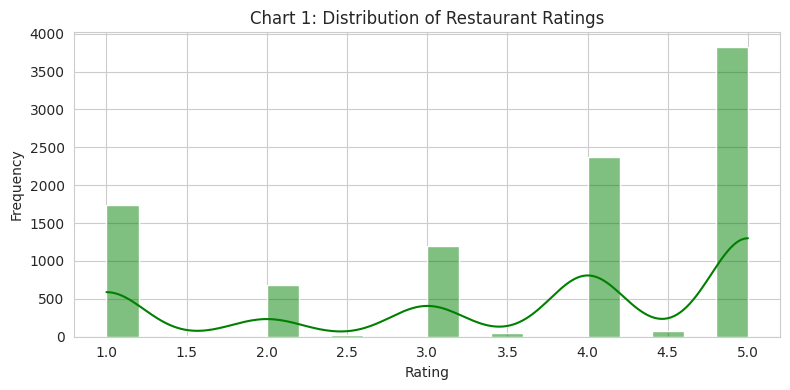

In [309]:
# ==========================================
# Chart 1: Distribution of Ratings
# ==========================================

plt.figure(figsize=(8,4))

sns.histplot(data=merged_df,
             x='rating',
             bins=20,
             kde=True,
             color = 'green')

plt.title("Chart 1: Distribution of Restaurant Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

*  To understand the overall distribution of customer satisfaction.

*  To check whether ratings are normally distributed, skewed, or concentrated.

*  To verify if rating has enough variance for clustering.

*  Histogram + KDE helps visualize both frequency and density trend.

*  Rating will be one of the strongest clustering features → must understand its behavior first.

##### 2. What is/are the insight(s) found from the chart?

*  Ratings are heavily concentrated between 4.0 and 5.0.

*  Very high spike at 5.0 rating.

*  Very few restaurants have ratings between 2.5 – 3.5.

*  Noticeable count at 1.0 rating (indicating strongly dissatisfied customers).

*  Distribution is right-skewed toward high ratings.

*  Rating appears discrete rather than continuous (clear spikes at integers).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Signals**

*  Majority of restaurants are rated highly → platform quality perception is strong.

*  Strong high-rating cluster means Zomato brand trust is high.

*  High rating dominance may attract new users and increase retention.

---

**Potential Negative Signals**

*  Presence of many 1-star ratings indicates:

*  Service quality inconsistency.

*  Possible hygiene / delivery / food quality issues.

*  If too many restaurants have 5.0 ratings:

*  Possible rating inflation.

*  Reduced differentiation between good and excellent restaurants.

*  Clustering might form large “High Rating” cluster with weak separation.

#### **Chart - 2 Distribution of Restaurant Cost**

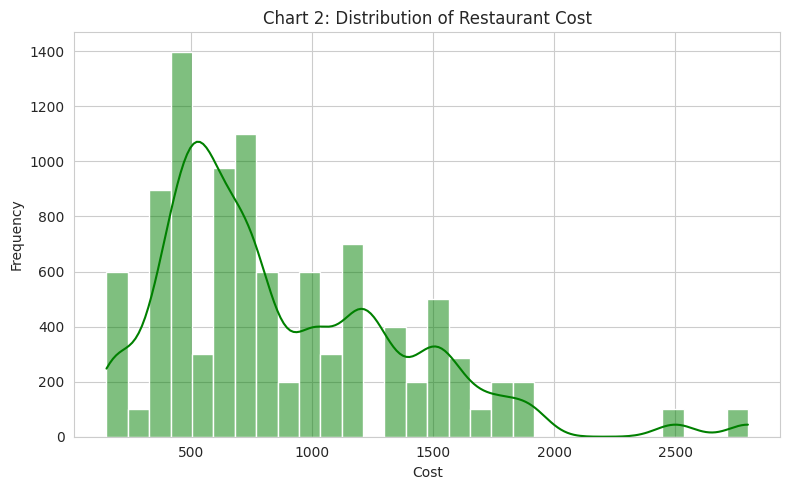

In [307]:
# ==========================================
# Chart 2: Distribution of Restaurant Cost
# ==========================================

plt.figure(figsize=(8,5))

sns.histplot(data=merged_df,
             x='cost',
             bins=30,
             kde=True,
             color = 'green')

plt.title("Chart 2: Distribution of Restaurant Cost")
plt.xlabel("Cost")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

*  Cost is a primary segmentation feature in restaurant clustering.

*  To understand price spread across restaurants.

*  To detect skewness and long-tail distribution.

*  To identify premium outliers.

*  To decide whether scaling or log transformation is needed before ML.

*  Histogram + KDE helps visualize density concentration and tail behavior.

##### 2. What is/are the insight(s) found from the chart?

*  Distribution is right-skewed (long tail toward high cost).

*  Majority of restaurants fall in the ₹400–₹1000 range.

*  Clear density peak around ₹500–₹700.

*  Very few restaurants exist beyond ₹2000+.

*  Premium restaurants (₹2500–₹2800) form a small niche segment.

*  Cost variance is high → good for clustering separation.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Signals**

*  Platform has strong presence in affordable & mid-range segment.

*  Wide cost variation allows:

    * Budget cluster

    * Mid-range cluster

    * Premium cluster

*  Enables targeted marketing campaigns:

    * Student segment (low cost)

    * Family dining (mid-range)

    *  Luxury dining (premium)

---
**Potential Negative Signals**

*  Heavy concentration in mid-range → high competition.

*  Premium restaurants are very few → revenue from luxury segment may be limited.

*  Right-skewness means:

    *  Clustering may get biased if scaling is not applied.

    *  High-cost restaurants could distort centroid positions.

#### **Chart - 3 Distribution of Review Length**

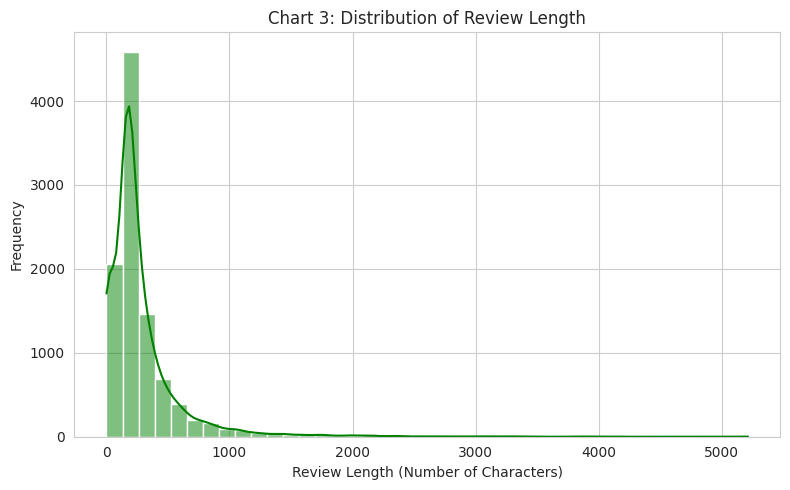

In [311]:
# ==========================================
# Chart 3: Distribution of Review Length
# ==========================================

# Create review length feature
merged_df['review_length'] = merged_df['review'].str.len()

plt.figure(figsize=(8,5))

sns.histplot(data=merged_df,
             x='review_length',
             bins=40,
             kde=True,
             color = 'green')

plt.title("Chart 3: Distribution of Review Length")
plt.xlabel("Review Length (Number of Characters)")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

*  To understand customer engagement depth (short vs detailed reviews).

*  To verify if text data is rich enough for sentiment modeling.

*  Review length can act as a clustering feature (emotional intensity indicator).

##### 2. What is/are the insight(s) found from the chart?

*  Distribution is heavily right-skewed (many short reviews, few long ones).

*  Majority of reviews are under 400–500 characters.

*  Presence of extreme long reviews (2000+ characters) → strong opinion cases.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

*  Short reviews suggest quick feedback culture → high platform activity.

*  Long reviews may indicate strong satisfaction/dissatisfaction → useful for sentiment-based clustering.

*  Skewness means scaling may be required if used in clustering to avoid dominance by extreme values.

#### **Chart - 4 Top Cuisines Distribution**

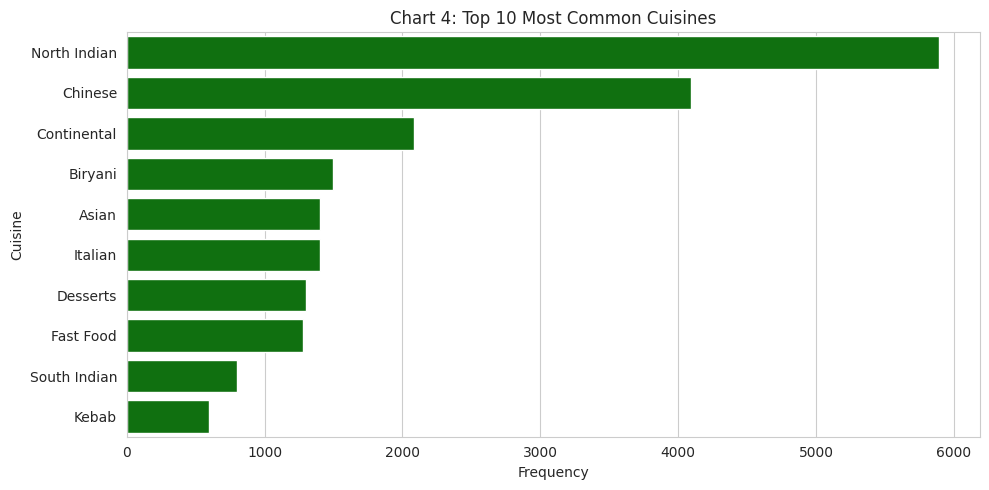

In [315]:
# ==========================================
# Chart 4: Top 10 Most Common Cuisines
# ==========================================

# Split cuisines if multiple cuisines are comma separated
cuisine_series = merged_df['cuisines'].str.split(',').explode().str.strip()

top_cuisines = cuisine_series.value_counts().head(10)

plt.figure(figsize=(10,5))

sns.barplot(x=top_cuisines.values,
            y=top_cuisines.index,color='green')

plt.title("Chart 4: Top 10 Most Common Cuisines")
plt.xlabel("Frequency")
plt.ylabel("Cuisine")

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

*  Cuisine is a strong categorical driver for restaurant segmentation.

*  To understand market dominance and concentration.

*  Helps identify cuisine-based clustering potential.

##### 2. What is/are the insight(s) found from the chart?

*  North Indian dominates significantly (clear market leader).

*  Chinese is second strongest category.

*  Remaining cuisines have relatively balanced mid-level presence.

*  Market is concentrated around few dominant cuisines.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

*  High dominance of North Indian → intense competition in that segment.

*  Opportunity to differentiate via niche cuisines (e.g., Kebab, South Indian).

*  Cuisine-based clustering can help targeted promotions and category optimization.

#### **Chart - 5 Top 10 Collections**

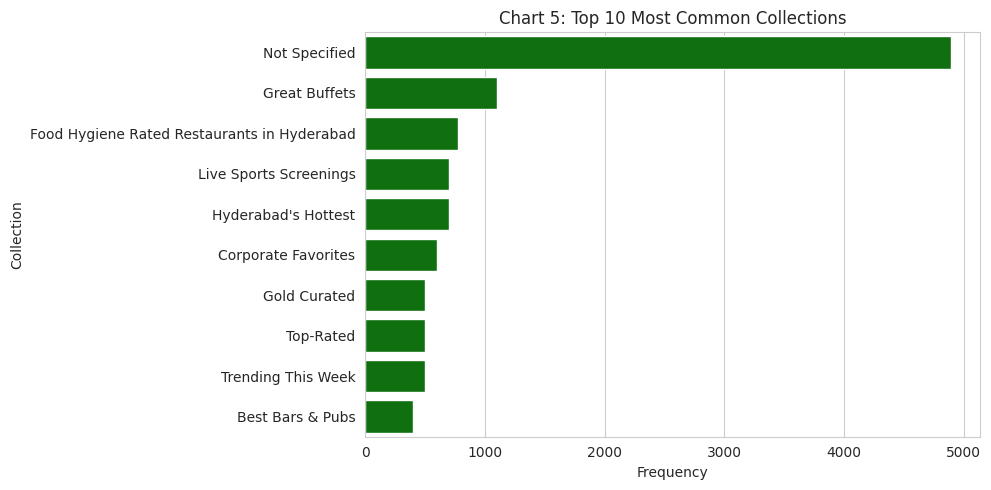

In [316]:
# ==========================================
# Chart 5: Top 10 Most Common Collections
# ==========================================

collection_series = merged_df['collections'].str.split(',').explode().str.strip()

top_collections = collection_series.value_counts().head(10)

plt.figure(figsize=(10,5))

sns.barplot(x=top_collections.values,
            y=top_collections.index,
            color='green')

plt.title("Chart 5: Top 10 Most Common Collections")
plt.xlabel("Frequency")
plt.ylabel("Collection")

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

*  Collections represent marketing positioning of restaurants.

*  Helps identify dominant promotional themes on the platform.

*  Useful for behavioral clustering (e.g., Buffet cluster, Sports cluster).

##### 2. What is/are the insight(s) found from the chart?

*  “Not Specified” dominates heavily → many restaurants lack collection tagging.

*  “Great Buffets” is the strongest defined collection.

*  Event-based and lifestyle collections (Live Sports, Corporate, Bars) have moderate presence.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

*  Large “Not Specified” share suggests underutilized tagging → opportunity for better curation.

*  Buffet & Top-Rated collections can be segmented for premium campaigns.

*  Better collection tagging could improve personalization & recommendation systems.

### **Bivariate Analysis**

#### Chart - 6

In [259]:
# Chart - 6 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [260]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [261]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [262]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [263]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [264]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [265]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [266]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [267]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

In [268]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [269]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [270]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [271]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [272]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [273]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [274]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [275]:
# Expand Contraction

#### 2. Lower Casing

In [276]:
# Lower Casing

#### 3. Removing Punctuations

In [277]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [278]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [279]:
# Remove Stopwords

In [280]:
# Remove White spaces

#### 6. Rephrase Text

In [281]:
# Rephrase Text

#### 7. Tokenization

In [282]:
# Tokenization

#### 8. Text Normalization

In [283]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [284]:
# POS Taging

#### 10. Text Vectorization

In [285]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [286]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [287]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [288]:
# Transform Your data

### 6. Data Scaling

In [289]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [290]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [291]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [292]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [293]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [294]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [295]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [296]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [297]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [298]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [299]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [300]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [301]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [302]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***